# Implementing t-SNE on different datasets

### Blogposts followed:
- MLExplained : https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/
- Alexander Fabisch t-SNE notebook : https://nbviewer.jupyter.org/urls/gist.githubusercontent.com/AlexanderFabisch/1a0c648de22eff4a2a3e/raw/59d5bc5ed8f8bfd9ff1f7faa749d1b095aa97d5a/t-SNE.ipynb

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
# creating synthetic dataset
A = np.random.normal(scale=1, size=(100, 3))
B = np.array([x for x in np.random.normal(scale=5, size=(500, 3)) if np.linalg.norm(x) > 7])

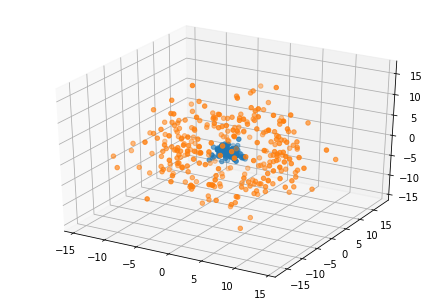

In [5]:
# visualizing data in 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(A[:, 0], A[:, 1], A[:, 2])
ax.scatter(B[:, 0], B[:, 1], B[:, 2])

In [7]:
# visualizing it after PCA
X = np.r_[A, B]
X2 = PCA(n_components=2).fit_transform(X)

In [10]:
print(X.shape); print(X2.shape)

(388, 3)
(388, 2)


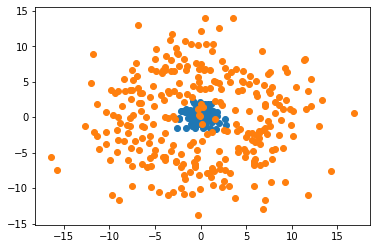

In [11]:
A2 = X2[:A.shape[0], :]
B2 = X2[A.shape[0]:, :]
plt.scatter(A2[:, 0], A2[:, 1])
plt.scatter(B2[:, 0], B2[:, 1])

Since PCA is a linear projection, it cannot capture non-linear dependencies.

In [14]:
# visualizing after t-SNE
X3 = TSNE(n_components=2).fit_transform(X)

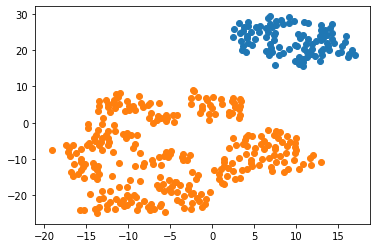

In [15]:
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

It can be seen that the points from the two clusters are well separated.

In [19]:
# running t-SNE multiple times to see how the results change
def plot_tsne():
    X3 = TSNE(n_components=2).fit_transform(X)
    A3 = X3[:A.shape[0], :]
    B3 = X3[A.shape[0]:, :]
    plt.scatter(A3[:, 0], A3[:, 1])
    plt.scatter(B3[:, 0], B3[:, 1])

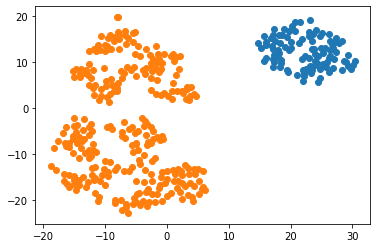

In [22]:
# 1
plot_tsne()

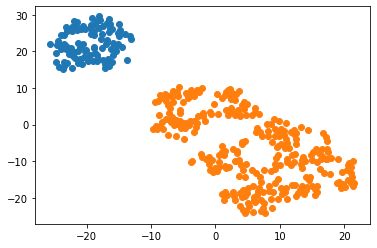

In [23]:
# 2
plot_tsne()

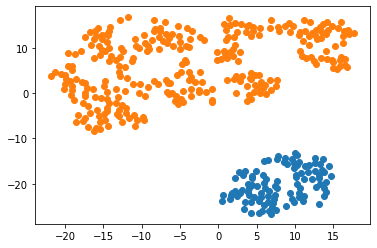

In [24]:
# 3
plot_tsne()

Results change but still are fairly reliable.

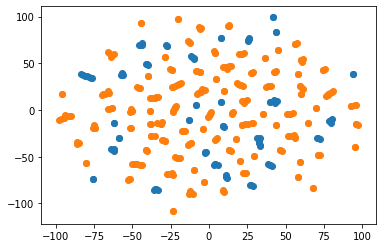

In [26]:
# experimenting with perplexity = 1
X3 = TSNE(n_components=2, perplexity=1).fit_transform(X)
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

With perplexity 1 all the points are scattered with no structure. It is because perplexity-1 means you only look at one neighbor for each point, which makes it difficult to find local structure.

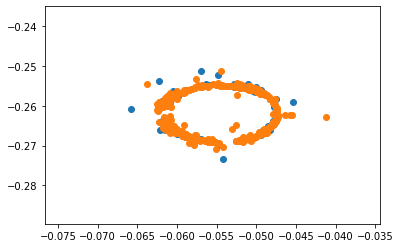

In [28]:
# experimenting with perplexity = 400
X3 = TSNE(n_components=2, perplexity=400).fit_transform(X)
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

With perplexity 400 all the points are in one blob. It's because, in this case, perplexity-400 means all the points are considered as neighbors.

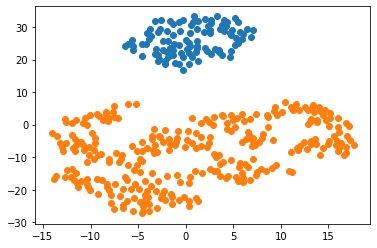

In [33]:
# experimenting with early exaggeration
# early exaggeration strengthens the ties between local points to create smaller clusters
# during initial optimization

# experimenting with early exaggeration = 1
X3 = TSNE(n_components=2, early_exaggeration=1).fit_transform(X)
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

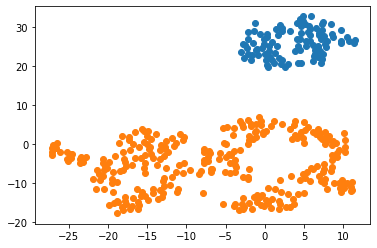

In [37]:
# experimenting with early exaggeration=500
X3 = TSNE(n_components=2, early_exaggeration=500).fit_transform(X)
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

## t-SNE on Iris

In [39]:
iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
X_pca = PCA().fit_transform(iris.data)

Text(0.5, 1.0, 'PCA')

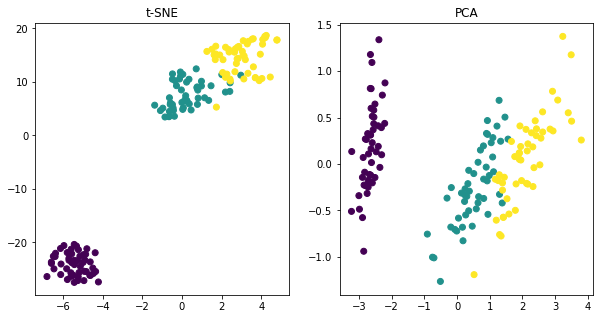

In [43]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.title('t-SNE')
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.title('PCA')

t-SNE can help us to decide whether classes are separable in some linear or nonlinear representation. Here we can see that the 3 classes of the Iris dataset can be separated quite easily. They can even be separated linearly which we can conclude from the low-dimensional embedding of the PCA.

## t-SNE on 20 newsgroups dataset

For high dimensional data, PCA is not applicable since it is a linear projection. Also many other manifold learning algorithms do not yield good visualizations either because they try to preserve the global data structure.

In [46]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
vectors = TfidfVectorizer().fit_transform(newsgroups.data)

In [48]:
# The repr module provides a means for producing object representations 
print(repr(vectors))

<2034x34118 sparse matrix of type '<class 'numpy.float64'>'
	with 323433 stored elements in Compressed Sparse Row format>


For high-dimensional sparse data it is helpful to first reduce the dimensions to 50 dimensions with TruncatedSVD and then perform t-SNE. This will usually improve the visualization.

In [50]:
X_reduced = TruncatedSVD(n_components=50, random_state=42).fit_transform(vectors)

In [51]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2034 samples in 0.003s...
[t-SNE] Computed neighbors for 2034 samples in 0.455s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2034
[t-SNE] Computed conditional probabilities for sample 2000 / 2034
[t-SNE] Computed conditional probabilities for sample 2034 / 2034
[t-SNE] Mean sigma: 0.107990
[t-SNE] Computed conditional probabilities in 0.135s
[t-SNE] Iteration 50: error = 74.2741013, gradient norm = 0.1129712 (50 iterations in 1.207s)
[t-SNE] Iteration 100: error = 73.9129868, gradient norm = 0.0889382 (50 iterations in 1.047s)
[t-SNE] Iteration 150: error = 73.9889069, gradient norm = 0.0800458 (50 iterations in 0.881s)
[t-SNE] Iteration 200: error = 73.7967834, gradient norm = 0.0819906 (50 iterations in 1.029s)
[t-SNE] Iteration 250: error = 73.8832474, gradient norm = 0.1041127 (50 iterations in 1.035s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.883247
[t-SNE] Iteration 300: err

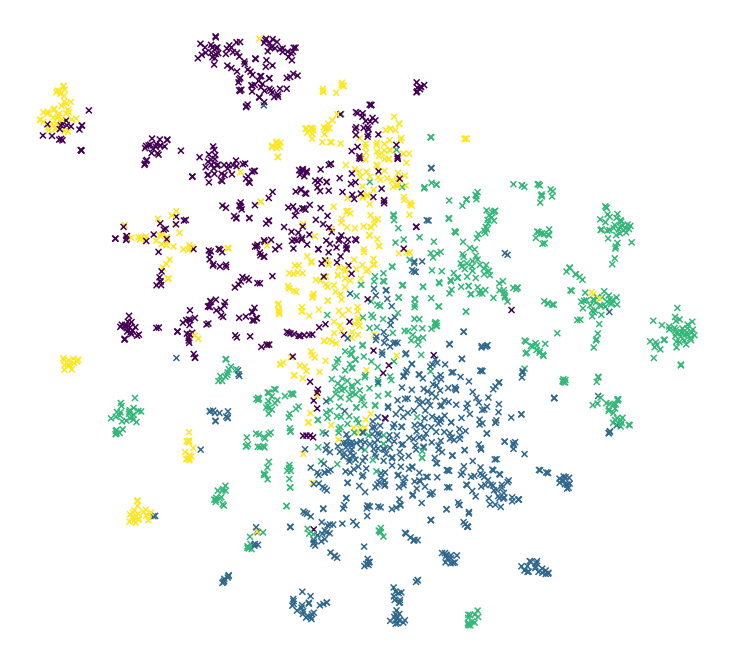

In [55]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=newsgroups.target, marker="x")